# Data

In [1]:
import os
import pandas as pd
import numpy as np
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid')
!pip install wordcloud
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [4]:
import os

# Define the URL of the dataset
url = "https://raw.githubusercontent.com/mohammad95labbaf/TransformerSentimentAnalysis/main/training-NLP.csv"

# Define the filename to save the dataset
filename = "training-NLP.csv"

# Download the dataset using wget
os.system(f"wget {url}")

# Load the dataset using pandas
import pandas as pd
df = pd.read_csv(filename)

# Print the first few rows of the dataset
print(df.head())


   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     


In [8]:
import pandas as pd

# Load the dataset from the GitHub repository
url = "https://raw.githubusercontent.com/mohammad95labbaf/TransformerSentimentAnalysis/main/training-NLP.csv"
data = pd.read_csv(url)

### Dataset Description

The dataset provided consists of tweets with information about various entities, their sentiment, and tweet content. It has been split into training and testing sets for sentiment analysis tasks. Below is a detailed description of the dataset:

---

### Data Columns

1. **Tweet ID**:  
   - A unique identifier for each tweet in the dataset.

2. **Entity**:  
   - The subject or topic mentioned in the tweet (e.g., Overwatch, Tom Clancy’s Ghost Recon, PlayStation5).

3. **Sentiment**:  
   - The sentiment expressed in the tweet, classified into the following categories:
     - **Neutral**: No strong emotion or opinion is expressed.
     - **Positive**: Indicates favorable or positive sentiment.
     - **Negative**: Indicates unfavorable or negative sentiment.
     - **Irrelevant**: Unrelated to the target entity or topic.

4. **Tweet Content**:  
   - The text of the tweet, which contains user opinions, comments, or other forms of textual data.

---

### Data Splits

- **Training Set**:
  - Size: 59,745 tweets
  - Purpose: Used to train the machine learning or deep learning models for sentiment classification.
  - Example:  
    ```
    Tweet ID: 9472  
    Entity: Overwatch  
    Sentiment: Neutral  
    Tweet Content: My goodness @ AmbarKOrtiz was SO mad at me for turning her bag into a bastion of LOL- AND sweet spray.
    ```

- **Validation Set**:
  - Size: 14,937 tweets
  - Purpose: Used to evaluate the model's performance on unseen data and tune hyperparameters.
  - Example:  
    ```
    Tweet ID: 11054  
    Entity: TomClancy’sGhostRecon  
    Sentiment: Positive  
    Tweet Content: I must say that for every moment of fun I have at Breakpoint, it serves me at least eight moments of frustration.
    ```

---


In [9]:
# Split the data into training and testing sets
train, validation = train_test_split(data, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training data shape:", train.shape)
print("Testing data shape:", validation.shape)



Training data shape: (59744, 4)
Testing data shape: (14937, 4)


In [10]:
train.columns=['Tweet ID','Entity','Sentiment','Tweet Content']
validation.columns=['Tweet ID','Entity','Sentiment','Tweet Content']

print("Training DataSet: \n")
display(train.head())

Training DataSet: 



,Tweet ID,Entity,Sentiment,Tweet Content
8581,9472,Overwatch,Neutral,My mercy @ AmbarKOrtiz was SO mad at me for ma...
71533,11054,TomClancysGhostRecon,Positive,I must say that for every moment of fun I have...
67251,7116,johnson&johnson,Neutral,Business AwesomeCapital : Johnson & Meyer John...
41061,1446,Battlefield,Positive,3 Here there it also is! As I finally found th...
16591,9643,PlayStation5(PS5),Positive,"At the same time, despite the fact that there ..."


In [11]:
print("Validation DataSet: \n")
display(validation.head())

Validation DataSet: 



,Tweet ID,Entity,Sentiment,Tweet Content
34877,6792,Fortnite,Irrelevant,went to go in george's room to find his door w...
21704,4115,CS-GO,Positive,Yo this looks LIT! Team:GO/Overwatch combo
47008,5665,HomeDepot,Negative,Pay attention executive administrators. While ...
7969,9369,Overwatch,Irrelevant,Guy looked at me and says my name was put on t...
454,2476,Borderlands,Positive,one


In [12]:
train = train.dropna(subset=['Tweet Content'])

validation = validation.dropna(subset=['Tweet Content'])

display(train.isnull().sum())
display(validation.isnull().sum())

,0
Tweet ID,0
Entity,0
Sentiment,0
Tweet Content,0


,0
Tweet ID,0
Entity,0
Sentiment,0
Tweet Content,0


### Data Analysis Description

#### 1. **Number of Unique Entities**
- The dataset contains **32 unique classes** under the "Entity" column. These represent different topics or entities being discussed in the tweets.

#### 2. **Sentiment Distribution**
The distribution of sentiments across the training and validation datasets is as follows:

| Sentiment   | Train Data | Validation Data |
|-------------|------------|-----------------|
| **Negative** | 17,336     | 4,449           |
| **Positive** | 15,700     | 4,147           |
| **Neutral**  | 14,078     | 3,517           |
| **Irrelevant** | 10,024     | 2,546           |

- **Observation**:
  - The dataset has a relatively balanced distribution of sentiments, with "Negative," "Positive," and "Neutral" being the most common labels.
  - The "Irrelevant" class has fewer samples compared to the other sentiment classes.

#### 3. **Implications for Model Training**
- The balanced distribution across most sentiments is beneficial for training a robust model that doesn't overfit to a particular sentiment class.
- The smaller count of "Irrelevant" samples may require additional techniques to ensure the model effectively learns this class, such as:
  - **Data augmentation**: To generate synthetic samples for the "Irrelevant" class.
  - **Class weighting**: During training, to assign higher weight to less frequent classes.

#### 4. **Next Steps**
- **Preprocessing**: Ensure text data is clean and tokenized properly for transformer models.
- **Model Training**:
  - Use the training data to fine-tune transformer models.
  - Evaluate the model's performance on the validation dataset.
- **Analysis**:
  - Assess if the model's performance is consistent across all sentiment classes.
  - Address any class imbalance or misclassification issues identified during evaluation.

This analysis provides a clear understanding of the dataset's composition and paves the way for successful model training and evaluation.

In [13]:
duplicates = train[train.duplicated(subset=['Entity', 'Sentiment', 'Tweet Content'], keep=False)]
train = train.drop_duplicates(subset=['Entity', 'Sentiment', 'Tweet Content'], keep='first')

duplicates = validation[validation.duplicated(subset=['Entity', 'Sentiment', 'Tweet Content'], keep=False)]
validation = validation.drop_duplicates(subset=['Entity', 'Sentiment', 'Tweet Content'], keep='first')

In [14]:
# Find the number of unique classes
num_unique_classes = train['Entity'].nunique()
print("Number of unique classes:", num_unique_classes)

Number of unique classes: 32


In [15]:
# Assuming 'train' and 'validation' are your DataFrames

# Calculate sentiment counts for train and validation data
sentiment_counts_train = train['Sentiment'].value_counts()
sentiment_counts_validation = validation['Sentiment'].value_counts()

# Combine counts into a single DataFrame
combined_counts = pd.concat([sentiment_counts_train, sentiment_counts_validation], axis=1)

# Fill missing values (if any) with 0
combined_counts.fillna(0, inplace=True)

# Rename columns
combined_counts.columns = ['Train Data', 'Validation Data']  # Set desired column names

combined_counts

,Train Data,Validation Data
Sentiment,,
Negative,17387,4392
Positive,15705,4164
Neutral,14113,3468
Irrelevant,9956,2604


# EDA





### Description of the Pie Chart Visualization

#### **Purpose of the Chart**
The pie chart illustrates the **distribution of the most frequent entities** in the dataset, combining the data from both the training and validation sets. Each slice of the chart represents one entity, and its size corresponds to the entity's proportion relative to others.

---

#### **Key Observations**
1. **Uniform Distribution**:
   - The proportions of the entities are relatively balanced, with the top entities each contributing approximately the same percentage to the dataset.
   - This distribution indicates no significant dominance of a single entity in the dataset.

2. **Top Entities Representation**:
   - The top 32 entities in the dataset are represented in the visualization. These entities are the most frequently occurring ones in both the training and validation datasets combined.

3. **Data Representation**:
   - The chart aggregates entity counts from both training and validation data, ensuring a comprehensive overview of the most prominent entities in the dataset.

---

#### **Definitions**
1. **Entity**: Refers to the subject or topic mentioned in the tweets, such as product names, company names, or general topics.
2. **Top Entities**: The entities with the highest frequencies in the dataset, selected for visualization.

---

#### **Applications of the Chart**
- **Dataset Insights**:
  - Understand which entities dominate the dataset.
  - Identify if any entities require balancing or additional data preprocessing.
- **Model Design**:
  - Assess if the distribution of entities might influence sentiment classification.
  - Focus model evaluation on ensuring fair performance across frequently occurring entities.

---

In [16]:
import plotly.graph_objects as go

# Get the total number of unique entities in both train and validation data
num_entities_train = train['Entity'].nunique()
num_entities_validation = validation['Entity'].nunique()
num_entities_total = num_entities_train + num_entities_validation - len(set(train['Entity']) & set(validation['Entity']))

# Calculate the value counts of 'Entity'
entity_counts = pd.concat([train['Entity'], validation['Entity']]).value_counts()

top_names = entity_counts.head(num_unique_classes)

# Create a pie chart
fig = go.Figure(data=[go.Pie(labels=top_names.index, values=top_names.values)])

# Update layout
fig.update_layout(title='Entire Entities in Train Data', width=1200, height=800)

# Show the plot
fig.show()

#### **Purpose of the Chart**


**Analysis of the Figure**

* **Type of Visualization:** The figure employs pie charts within a subplot grid. Pie charts are used to show the proportions of different categories within a whole, in this case, the distribution of sentiments (Negative, Positive, Neutral, Irrelevant) for each entity. The subplot grid allows for easy comparison of sentiment distribution across multiple entities.

* **Data Representation:** Each pie chart represents an entity (e.g., Verizon, MaddenNFL, CallOfDuty) and is divided into four segments, each representing a sentiment category. The size of each segment corresponds to the proportion of that sentiment in the data for that entity.

* **Color Scheme:** The figure uses distinct colors for each sentiment category, making it easy to visually distinguish the proportions of different sentiments within each pie chart.

* **Layout:** The subplot grid is organized in a 2x5 format, accommodating ten entities in a clear and structured manner. The layout allows for quick comparison of sentiment distribution across entities.

**Applications of the Figure**

* **Sentiment Analysis:** The figure provides a clear visualization of sentiment analysis results, making it easy to understand the overall sentiment towards different entities. This information can be valuable for businesses to gauge public opinion towards their products or services.

* **Comparative Analysis:** The subplot grid allows for easy comparison of sentiment distribution across multiple entities. This can help identify entities with predominantly positive or negative sentiment and understand the factors contributing to these sentiments.

* **Data-Driven Decision Making:** The insights gained from the figure can inform data-driven decision-making in various domains, such as marketing, product development, and customer service. For example, businesses can use sentiment analysis to identify areas for improvement in their products or services and tailor their marketing strategies accordingly.

* **Trend Identification:** By analyzing sentiment data over time, it's possible to identify trends in public opinion towards different entities. This information can be valuable for businesses to anticipate future challenges and opportunities.

* **Communication and Reporting:** The figure provides a clear and concise way to communicate sentiment analysis results to both technical and non-technical audiences. This can be valuable for reporting findings to stakeholders and facilitating discussions around sentiment data.

**Additional Considerations**

* **Data Source:** The figure is based on sentiment analysis performed on a training dataset. It's important to consider the source and quality of the data when interpreting the results.

* **Context:** The interpretation of sentiment analysis results should always be done in context. Factors such as the domain, time period, and target audience can influence the meaning of sentiment data.

* **Limitations:** Pie charts can become less effective when dealing with a large number of categories or when comparing subtle differences in proportions. In such cases, other visualization techniques like bar charts or stacked bar charts might be more appropriate.

Overall, the figure provides a valuable tool for understanding and communicating sentiment analysis results. Its applications span various domains and can inform data-driven decision-making in numerous ways.


In [17]:
from plotly.subplots import make_subplots

# Define the entities
entities = ['Verizon', 'MaddenNFL', 'CallOfDuty', 'Facebook', 'TomClancysGhostRecon', 'NBA2K', 'ApexLegends', 'TomClancysRainbowSix', 'Microsoft', 'FIFA']

# Define the sentiment counts for each entity
verizon_counts = train[train['Entity'] == 'Verizon']['Sentiment'].value_counts()
maddennfl_counts = train[train['Entity'] == 'MaddenNFL']['Sentiment'].value_counts()
callofduty_counts = train[train['Entity'] == 'CallOfDuty']['Sentiment'].value_counts()
facebook_counts = train[train['Entity'] == 'Facebook']['Sentiment'].value_counts()
tomclancy_counts = train[train['Entity'] == 'TomClancysGhostRecon']['Sentiment'].value_counts()
nba2k_counts = train[train['Entity'] == 'NBA2K']['Sentiment'].value_counts()
apexlegends_counts = train[train['Entity'] == 'ApexLegends']['Sentiment'].value_counts()
tomclancysrainbow_counts = train[train['Entity'] == 'TomClancysRainbowSix']['Sentiment'].value_counts()
microsoft_counts = train[train['Entity'] == 'Microsoft']['Sentiment'].value_counts()
fifa_counts = train[train['Entity'] == 'FIFA']['Sentiment'].value_counts()

# Create a figure with subplots
fig = make_subplots(rows=2, cols=5, specs=[[{"type": "pie"}]*5]*2, subplot_titles=entities)

# Add a pie chart for each entity
fig.add_trace(go.Pie(labels=['Negative', 'Positive', 'Neutral', 'Irrelevant'], values=[verizon_counts['Negative'], verizon_counts['Positive'], verizon_counts['Neutral'], verizon_counts['Irrelevant']]), row=1, col=1)
fig.add_trace(go.Pie(labels=['Negative', 'Positive', 'Neutral', 'Irrelevant'], values=[maddennfl_counts['Negative'], maddennfl_counts['Positive'], maddennfl_counts['Neutral'], maddennfl_counts['Irrelevant']]), row=1, col=2)
fig.add_trace(go.Pie(labels=['Negative', 'Positive', 'Neutral', 'Irrelevant'], values=[callofduty_counts['Negative'], callofduty_counts['Positive'], callofduty_counts['Neutral'], callofduty_counts['Irrelevant']]), row=1, col=3)
fig.add_trace(go.Pie(labels=['Negative', 'Positive', 'Neutral', 'Irrelevant'], values=[facebook_counts['Negative'], facebook_counts['Positive'], facebook_counts['Neutral'], facebook_counts['Irrelevant']]), row=1, col=4)
fig.add_trace(go.Pie(labels=['Negative', 'Positive', 'Neutral', 'Irrelevant'], values=[tomclancy_counts['Negative'], tomclancy_counts['Positive'], tomclancy_counts['Neutral'], tomclancy_counts['Irrelevant']]), row=1, col=5)
fig.add_trace(go.Pie(labels=['Negative', 'Positive', 'Neutral', 'Irrelevant'], values=[nba2k_counts['Negative'], nba2k_counts['Positive'], nba2k_counts['Neutral'], nba2k_counts['Irrelevant']]), row=2, col=1)
fig.add_trace(go.Pie(labels=['Negative', 'Positive', 'Neutral', 'Irrelevant'], values=[apexlegends_counts['Negative'], apexlegends_counts['Positive'], apexlegends_counts['Neutral'], apexlegends_counts['Irrelevant']]), row=2, col=2)
fig.add_trace(go.Pie(labels=['Negative', 'Positive', 'Neutral', 'Irrelevant'], values=[tomclancysrainbow_counts['Negative'], tomclancysrainbow_counts['Positive'], tomclancysrainbow_counts['Neutral'], tomclancysrainbow_counts['Irrelevant']]), row=2, col=3)
fig.add_trace(go.Pie(labels=['Negative', 'Positive', 'Neutral', 'Irrelevant'], values=[microsoft_counts['Negative'], microsoft_counts['Positive'], microsoft_counts['Neutral'], microsoft_counts['Irrelevant']]), row=2, col=4)
fig.add_trace(go.Pie(labels=['Negative', 'Positive', 'Neutral', 'Irrelevant'], values=[fifa_counts['Negative'], fifa_counts['Positive'], fifa_counts['Neutral'], fifa_counts['Irrelevant']]), row=2, col=5)

# Customize the plot
fig.update_layout(title='Sentiment Analysis in Train Data', width=1200, height=800)

# Show the plot
fig.show()

### **Purpose of the Chart**

The chart provides a detailed analysis of sentiment distribution across multiple entities. By visualizing the proportion of sentiments (Negative, Positive, Neutral, Irrelevant) associated with each entity, it serves as an insightful tool for understanding public opinion and sentiment trends.

---

### **Analysis of the Figure**

#### **Type of Visualization**
- The figure uses **pie charts** arranged in a **subplot grid** to represent the sentiment distribution for different entities.
- Pie charts effectively display proportions, making them suitable for showcasing the breakdown of sentiments per entity.

#### **Data Representation**
- Each pie chart corresponds to an entity (e.g., *Verizon*, *MaddenNFL*, *CallOfDuty*) and is divided into four segments, representing sentiment categories: Negative, Positive, Neutral, and Irrelevant.
- The size of each segment reflects the sentiment's proportion in the dataset for the respective entity.

#### **Color Scheme**
- Distinct colors are assigned to each sentiment category, ensuring clarity and enhancing the ability to distinguish between the proportions.

#### **Layout**
- The subplot grid is organized in a **2x5 format**, displaying ten entities in a structured and easily comparable manner.

---

### **Applications of the Figure**

1. **Sentiment Analysis**:
   - The chart visualizes sentiment proportions, allowing quick identification of the overall sentiment trends for each entity.
   - It helps businesses and researchers gauge public opinion on various products, services, or topics.

2. **Comparative Analysis**:
   - The grid layout facilitates **comparison of sentiment distribution** across entities, highlighting those with predominantly positive or negative sentiments.

3. **Data-Driven Decision-Making**:
   - Insights derived from sentiment distributions can guide decisions in marketing, product development, and customer service by pinpointing strengths and areas for improvement.

4. **Trend Identification**:
   - Repeated analysis over time can reveal **trends in public opinion** for different entities, helping organizations anticipate and respond to challenges or opportunities.

5. **Effective Communication**:
   - The clear and structured format makes it an excellent tool for presenting sentiment analysis results to both technical and non-technical stakeholders.

---

### **Additional Considerations**

- **Data Source**: The chart reflects sentiment analysis results based on a training dataset. Data quality and relevance should be carefully evaluated when interpreting these findings.
  
- **Context**: Sentiment analysis results should always be interpreted within the appropriate context, considering factors like domain, time period, and target audience.
  
- **Limitations**:
   - Pie charts may be less effective when dealing with a large number of categories or subtle differences. Alternatives like bar or stacked bar charts could provide more precise comparisons in such cases.

---

### **Conclusion**
This visualization offers a clear and concise overview of sentiment distribution across entities. It is a versatile tool applicable in various domains, aiding in understanding trends, driving informed decisions, and effectively communicating results.

In [18]:
# Calculate sentiment counts
sentiment_counts_train = train['Sentiment'].value_counts()
sentiment_counts_validation = validation['Sentiment'].value_counts()

# Combine counts into a single DataFrame
combined_counts = pd.concat([sentiment_counts_train, sentiment_counts_validation], axis=1)

# Fill missing values (if any) with 0
combined_counts.fillna(0, inplace=True)

# Rename columns
combined_counts.columns = ['Train Data', 'Validation Data']  # Set desired column names

# Create subplots
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]], subplot_titles=("Training Data", "Validation Data"), horizontal_spacing=0.1)

# Create pie chart for training data
fig.add_trace(go.Pie(labels=sentiment_counts_train.index, values=sentiment_counts_train, textinfo='label+percent', textposition='inside'), row=1, col=1)

# Create pie chart for validation data
fig.add_trace(go.Pie(labels=sentiment_counts_validation.index, values=sentiment_counts_validation, textinfo='label+percent', textposition='inside'), row=1, col=2)

# Update layout
fig.update_layout(title='Sentiment Distribution', font_size=20, width=1200, height=600)

# Show the plot
fig.show()


# Create bar chart for sentiment distribution
sentiments = combined_counts.index
train_data = combined_counts['Train Data']
validation_data = combined_counts['Validation Data']

# Create the figure
fig = go.Figure(data=[
    go.Bar(name='Train', x=sentiments, y=train_data),
    go.Bar(name='Validation', x=sentiments, y=validation_data)
])

# Customize the plot
fig.update_layout(
    title='Sentiment Distribution',
    xaxis_title='Sentiment',
    yaxis_title='Count',
    barmode='group'
)

# Show the plot
fig.show()

Based on the provided pie charts, which represent the sentiment distribution of the training and validation datasets for a sentiment analysis task, here's a detailed report:

---

### **Observations**
1. **Sentiment Categories:**
   - The data is categorized into four sentiments: **Negative**, **Positive**, **Neutral**, and **Irrelevant**.

2. **Distribution in Training Data:**
   - **Negative**: 30.3% (the largest portion, indicating the dataset has more negative samples than any other class).
   - **Positive**: 27.5% (the second-largest portion, closely following Negative).
   - **Neutral**: 24.6% (a moderate amount).
   - **Irrelevant**: 17.5% (the smallest category).

3. **Distribution in Validation Data:**
   - **Negative**: 30.3% (consistent with the training set, ensuring a balanced representation of this class).
   - **Positive**: 28.3% (slightly higher than in the training set).
   - **Neutral**: 24% (slightly lower than in the training set).
   - **Irrelevant**: 17.4% (almost identical to the training set).

4. **Overall Balance:**
   - The distribution between the training and validation datasets is very consistent, which is ideal for training machine learning models. This consistency ensures that the model is exposed to a similar distribution during training and evaluation.

---

### **Strengths of the Dataset**
1. **Class Representation:**
   - The dataset appears fairly well-balanced among the first three categories (**Negative**, **Positive**, and **Neutral**), with percentages in the 24–30% range.
   - Although the **Irrelevant** class is smaller, it still holds a significant portion (around 17.5%), which helps capture the nuances of this category.

2. **Consistency:**
   - The close alignment of the training and validation data distributions ensures that the model will be tested on a representative sample, reducing the risk of overfitting to specific classes in the training set.

---

### **Challenges**
1. **Class Imbalance for "Irrelevant":**
   - The **Irrelevant** category is underrepresented compared to the other three, which might make it challenging for models to correctly classify instances belonging to this class.
   - Models might favor the more frequent classes, resulting in lower precision and recall for the "Irrelevant" class.

---

### **Recommendations**
1. **Mitigate Class Imbalance:**
   - Use techniques such as oversampling the **Irrelevant** class, undersampling other classes, or applying class-specific weights during training to improve model performance for this minority class.

2. **Performance Evaluation:**
   - Closely monitor metrics like **precision**, **recall**, and **F1-score** for the "Irrelevant" category during evaluation, as they are likely to be lower.

3. **Data Augmentation:**
   - Consider augmenting the **Irrelevant** class by generating synthetic examples or collecting more real-world samples to strengthen model performance in this area.

4. **Stratified Splits:**
   - Ensure stratified splitting is used if further data splitting is necessary, maintaining the class proportions across subsets.

---


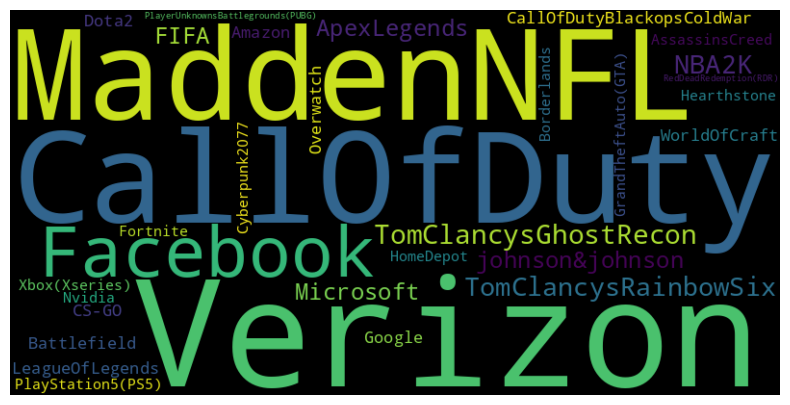

In [19]:
# Calculate the value counts of 'Entity'
entity_counts = train['Entity'].value_counts()

top_names = entity_counts.head(num_unique_classes)

# Create a word cloud
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(top_names)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

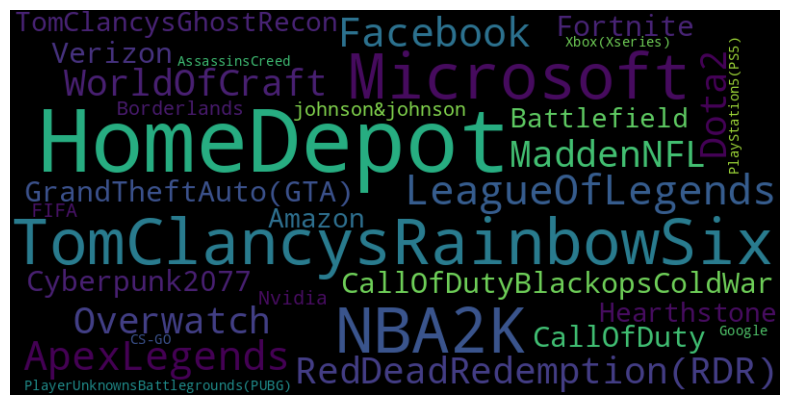

In [20]:
# Calculate the value counts of 'Entity'
entity_counts = validation['Entity'].value_counts()

top_names = entity_counts.head(num_unique_classes)

# Create a word cloud
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(top_names)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



### **Analysis**
1. **Word Cloud Purpose:**
   - The word cloud highlights the most frequently mentioned entities in the dataset, with their sizes corresponding to their relative frequencies.

2. **Top Entities:**
   - Entities like **"Verizon," "CallofDuty," "MaddenNFL," "Facebook,"** and **"ApexLegends"** stand out due to their larger sizes, indicating they are among the most frequently occurring in the dataset.
   - Other notable entities include **"Microsoft," "NBA2K,"** and **"TomClancysGhostRecon."**

3. **Diversity of Entities:**
   - The entities represent a mix of industries and categories, including:
     - **Video Games:** Call of Duty, Madden NFL, Apex Legends, NBA 2K.
     - **Technology:** Facebook, Microsoft, Nvidia.
     - **Retail:** Amazon, Home Depot.

4. **Entity Representation:**
   - The word cloud is dominated by entities related to gaming and technology, suggesting that the dataset heavily revolves around these topics.

---

### **Insights**
1. **Gaming Dominance:**
   - The prominence of gaming-related terms such as **"CallofDuty," "MaddenNFL,"** and **"ApexLegends"** indicates a strong focus on the gaming industry.

2. **Brand Presence:**
   - Major technology and communication brands like **"Verizon," "Facebook,"** and **"Microsoft"** also appear frequently, pointing to their relevance in the dataset.

3. **Balanced Diversity:**
   - While gaming terms are dominant, there is still representation from other sectors, such as retail (**Amazon**) and hardware (**Nvidia**).

---

### **Recommendations**
1. **Further Analysis:**
   - Investigate the context or sentiment associated with the top entities, especially those dominating the word cloud (e.g., Verizon, Call of Duty).
   - Analyze the frequency distribution to confirm whether the dataset skews toward gaming and technology.

2. **Expand Focus:**
   - If the dataset is meant to cover a broader range of topics, consider adding more data related to underrepresented categories (e.g., healthcare, education).

3. **Use in Modeling:**
   - Use the frequency data as features for machine learning models if entity importance is a factor in classification or prediction.


# Transformers Model

#### **Key Features**

1. **Multi-Model Compatibility**  
   The framework allows users to select from several transformer-based models:
   - BERT
   - RoBERTa
   - DistilBERT
   - ALBERT
   - XLNet  

2. **Flexible Preprocessing**  
   The framework preprocesses input text data by mapping sentiment classes to numerical labels, tokenizing the text, and creating padded sequences for model consumption.

3. **Custom Dataset Class**  
   A dedicated `SentimentDataset` class is implemented for managing tokenized inputs, attention masks, and labels, ensuring efficient data loading.

4. **Training and Evaluation**  
   - **Training**: Supports configurable hyperparameters like batch size, learning rate, and number of epochs. Outputs metrics such as loss and accuracy per epoch.  
   - **Evaluation**: Includes metrics such as accuracy, precision, recall, F1-score, and confusion matrix visualization for comprehensive performance analysis.

5. **GPU Acceleration**  
   Automatically utilizes GPU resources when available for faster training and inference.

6. **Model Saving**  
   Trained models can be saved for future use and deployment.

---

#### **Implementation Details**

1. **Initialization**  
   The `SentimentAnalyzer` class initializes the framework with user-defined configurations, including model type, number of labels, batch size, learning rate, and training epochs. The class dynamically loads the appropriate tokenizer and model based on the selected transformer type.

2. **Preprocessing**  
   The `preprocess_data` method prepares input data, mapping sentiments to numerical labels for compatibility with the model.

3. **Training Workflow**  
   The `train` method:
   - Loads data via the `SentimentDataset` class.
   - Uses the AdamW optimizer to update model weights.
   - Outputs batch-level and epoch-level metrics for training progress monitoring.

4. **Evaluation Workflow**  
   The `evaluate` method:
   - Processes test data similarly to training data.
   - Computes accuracy and classification metrics.
   - Visualizes a confusion matrix using Matplotlib for performance diagnostics.

5. **Model Saving**  
   The `save_model` method exports the trained model's state dictionary to a user-specified path for reuse.

---

#### **Evaluation Metrics**

The evaluation process outputs:
1. **Accuracy**  
   The ratio of correctly classified samples.
2. **Classification Report**  
   A detailed report showing precision, recall, and F1-score for each sentiment class.
3. **Confusion Matrix**  
   A graphical representation of true vs. predicted classifications.

---


In [ ]:
data_train = train[['Tweet Content', 'Sentiment']]
data_test = validation[['Tweet Content', 'Sentiment']]

data_train_reduced = data_train.sample(6000, random_state=42)
data_test_reduced = data_test.sample(1000, random_state=42)

In [ ]:
from transformers import (
    BertTokenizer, BertForSequenceClassification,
    RobertaTokenizer, RobertaForSequenceClassification,
    DistilBertTokenizer, DistilBertForSequenceClassification,
    AlbertTokenizer, AlbertForSequenceClassification,
    XLNetTokenizer, XLNetForSequenceClassification,
    AdamW
)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

class SentimentAnalyzer:
    """
    A class for sentiment analysis using transformer-based models.
    Supports BERT, RoBERTa, DistilBERT, ALBERT, and XLNet.
    """

    def __init__(self, model_type="roberta", num_labels=4, batch_size=64, learning_rate=2e-5, num_epochs=10):
        """
        Initialize the sentiment analyzer.

        Args:
        - model_type (str): The type of transformer model to use (e.g., "bert", "roberta").
        - num_labels (int): Number of sentiment classes.
        - batch_size (int): Batch size for training and evaluation.
        - learning_rate (float): Learning rate for AdamW optimizer.
        - num_epochs (int): Number of training epochs.
        """
        self.model_type = model_type
        self.num_labels = num_labels
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')  # Use GPU if available

        # Initialize model and tokenizer
        self.tokenizer, self.model = self._load_model_and_tokenizer()
        self.model.to(self.device)

    def _load_model_and_tokenizer(self):
        """
        Load the pre-trained model and tokenizer based on the selected model type.

        Returns:
        - tokenizer: The tokenizer for the selected transformer model.
        - model: The pre-trained transformer model for sequence classification.
        """
        model_name = {
            "bert": "bert-base-uncased",
            "roberta": "roberta-base",
            "distilbert": "distilbert-base-uncased",
            "albert": "albert-base-v2",
            "xlnet": "xlnet-base-cased"
        }.get(self.model_type, None)

        if model_name is None:
            raise ValueError(f"Unsupported model type: {self.model_type}")

        # Load appropriate model and tokenizer
        if self.model_type == "bert":
            return BertTokenizer.from_pretrained(model_name), BertForSequenceClassification.from_pretrained(model_name, num_labels=self.num_labels)
        elif self.model_type == "roberta":
            return RobertaTokenizer.from_pretrained(model_name), RobertaForSequenceClassification.from_pretrained(model_name, num_labels=self.num_labels)
        elif self.model_type == "distilbert":
            return DistilBertTokenizer.from_pretrained(model_name), DistilBertForSequenceClassification.from_pretrained(model_name, num_labels=self.num_labels)
        elif self.model_type == "albert":
            return AlbertTokenizer.from_pretrained(model_name), AlbertForSequenceClassification.from_pretrained(model_name, num_labels=self.num_labels)
        elif self.model_type == "xlnet":
            return XLNetTokenizer.from_pretrained(model_name), XLNetForSequenceClassification.from_pretrained(model_name, num_labels=self.num_labels)

    @staticmethod
    def preprocess_data(df):
        """
        Preprocess the data by mapping sentiments to numerical labels.

        Args:
        - df (DataFrame): Input DataFrame containing 'Tweet Content' and 'Sentiment'.

        Returns:
        - texts (list): List of tweet content.
        - labels (list): List of numerical sentiment labels.
        """
        df['label'] = df['Sentiment'].map({'Positive': 2, 'Negative': 0, 'Neutral': 1, 'Irrelevant': 3})
        return df['Tweet Content'].tolist(), df['label'].tolist()

    class SentimentDataset(Dataset):
        """
        Custom Dataset class for sentiment analysis.
        """
        def __init__(self, texts, labels, tokenizer, max_len=128):
            """
            Initialize the dataset.

            Args:
            - texts (list): List of input texts.
            - labels (list): List of sentiment labels.
            - tokenizer: Tokenizer for encoding the texts.
            - max_len (int): Maximum sequence length for tokenized inputs.
            """
            self.texts = texts
            self.labels = labels
            self.tokenizer = tokenizer
            self.max_len = max_len

        def __len__(self):
            return len(self.texts)

        def __getitem__(self, idx):
            text = str(self.texts[idx])
            label = self.labels[idx]

            encoding = self.tokenizer.encode_plus(
                text,
                add_special_tokens=True,
                max_length=self.max_len,
                return_token_type_ids=False,
                padding='max_length',
                truncation=True,
                return_attention_mask=True,
                return_tensors='pt',
            )

            return {
                'input_ids': encoding['input_ids'].flatten(),
                'attention_mask': encoding['attention_mask'].flatten(),
                'labels': torch.tensor(label, dtype=torch.long)
            }

    def train(self, train_texts, train_labels):
        """
        Train the model on the given training data.

        Args:
        - train_texts (list): List of input texts for training.
        - train_labels (list): List of sentiment labels for training.
        """
        train_dataset = self.SentimentDataset(train_texts, train_labels, self.tokenizer)
        train_loader = DataLoader(train_dataset, batch_size=self.batch_size, shuffle=True)

        optimizer = AdamW(self.model.parameters(), lr=self.learning_rate)

        for epoch in range(self.num_epochs):
            self.model.train()
            total_loss = 0
            correct = 0
            total = 0

            for batch_idx, batch in enumerate(train_loader):
                optimizer.zero_grad()
                input_ids = batch['input_ids'].to(self.device)
                attention_mask = batch['attention_mask'].to(self.device)
                labels = batch['labels'].to(self.device)

                outputs = self.model(input_ids, attention_mask=attention_mask, labels=labels)
                preds = torch.argmax(outputs.logits, dim=1)

                loss = outputs.loss
                loss.backward()
                optimizer.step()

                total_loss += loss.item()
                correct += (preds == labels).sum().item()
                total += labels.size(0)

                accuracy = correct / total
                print(f"Epoch [{epoch + 1}/{self.num_epochs}], Batch [{batch_idx + 1}/{len(train_loader)}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.4f}")

            epoch_accuracy = correct / total
            print(f"Epoch {epoch + 1} completed. Average Loss: {total_loss / len(train_loader):.4f}, Accuracy: {epoch_accuracy:.4f}")

    def evaluate(self, test_texts, test_labels):
        """
        Evaluate the model on the test data.

        Args:
        - test_texts (list): List of input texts for testing.
        - test_labels (list): List of sentiment labels for testing.
        """
        test_dataset = self.SentimentDataset(test_texts, test_labels, self.tokenizer)
        test_loader = DataLoader(test_dataset, batch_size=self.batch_size, shuffle=False)

        self.model.eval()
        test_preds = []
        test_true = []

        with torch.no_grad():
            for batch in test_loader:
                input_ids = batch['input_ids'].to(self.device)
                attention_mask = batch['attention_mask'].to(self.device)
                labels = batch['labels']

                outputs = self.model(input_ids, attention_mask=attention_mask)
                preds = torch.argmax(outputs.logits, dim=1).cpu().numpy()

                test_preds.extend(preds)
                test_true.extend(labels.numpy())

        accuracy = accuracy_score(test_true, test_preds)
        print(f'Test Accuracy: {accuracy:.4f}')

        print(classification_report(test_true, test_preds, target_names=['Negative', 'Neutral', 'Positive', 'Irrelevant']))

        conf_matrix = confusion_matrix(test_true, test_preds)
        conf_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Negative', 'Neutral', 'Positive', 'Irrelevant'])
        conf_display.plot(cmap='Blues')
        plt.title("Confusion Matrix")
        plt.grid(False)
        plt.tight_layout()
        plt.show()

    def save_model(self, save_path):
        """
        Save the trained model to the specified path.

        Args:
        - save_path (str): Path to save the model.
        """
        torch.save(self.model.state_dict(), save_path)
        print(f"Model saved to {save_path}")


In [ ]:
import os

# Define the directory where models will be saved
save_dir = "saved_models"
os.makedirs(save_dir, exist_ok=True)  # Create the directory if it doesn't exist

# Define the model types
model_types = ["bert", "roberta", "distilbert", "albert", "xlnet"]

# Preprocess data
train_texts, train_labels = SentimentAnalyzer.preprocess_data(data_train_reduced)
test_texts, test_labels = SentimentAnalyzer.preprocess_data(data_test_reduced)

# Iterate through model types
results = []

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch [1/10], Batch [1/94], Loss: 1.3751, Accuracy: 0.3750
Epoch [1/10], Batch [2/94], Loss: 1.4292, Accuracy: 0.2969
Epoch [1/10], Batch [3/94], Loss: 1.3967, Accuracy: 0.2865
Epoch [1/10], Batch [4/94], Loss: 1.3676, Accuracy: 0.2969
Epoch [1/10], Batch [5/94], Loss: 1.3637, Accuracy: 0.3031
Epoch [1/10], Batch [6/94], Loss: 1.3660, Accuracy: 0.3021
Epoch [1/10], Batch [7/94], Loss: 1.3575, Accuracy: 0.2946
Epoch [1/10], Batch [8/94], Loss: 1.3455, Accuracy: 0.2988
Epoch [1/10], Batch [9/94], Loss: 1.3609, Accuracy: 0.2882
Epoch [1/10], Batch [10/94], Loss: 1.3223, Accuracy: 0.2984
Epoch [1/10], Batch [11/94], Loss: 1.3529, Accuracy: 0.3011
Epoch [1/10], Batch [12/94], Loss: 1.3980, Accuracy: 0.2982
Epoch [1/10], Batch [13/94], Loss: 1.3172, Accuracy: 0.3089
Epoch [1/10], Batch [14/94], Loss: 1.3138, Accuracy: 0.3248
Epoch [1/10], Batch [15/94], Loss: 1.3674, Accuracy: 0.3323
Epoch [1/10], Batch [16/94], Loss: 1.3331, Accuracy: 0.3330
Epoch [1/10], Batch [17/94], Loss: 1.4187, Accura

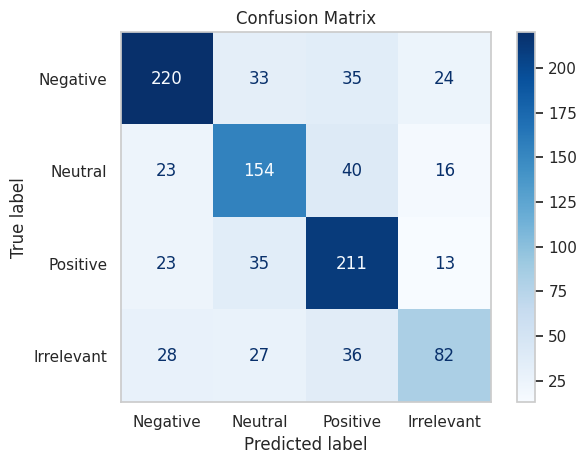

In [ ]:
# Initialize the sentiment analyzer
model_type="bert"
analyzer = SentimentAnalyzer(model_type="bert", num_labels=4, batch_size=64, learning_rate=1e-5, num_epochs=10)

# Train the model
analyzer.train(train_texts, train_labels)

# Save the trained model
model_save_path = os.path.join(save_dir, f"{model_type}_sentiment_model.pt")
analyzer.save_model(model_save_path)

# Evaluate the model
print(f"Evaluating model: {model_type.upper()}")
accuracy = analyzer.evaluate(test_texts, test_labels)

# Store results for later comparison
results.append({
    "model_type": model_type,
    "accuracy": accuracy
})

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch [1/10], Batch [1/94], Loss: 1.3353, Accuracy: 0.3594
Epoch [1/10], Batch [2/94], Loss: 1.3924, Accuracy: 0.3281
Epoch [1/10], Batch [3/94], Loss: 1.4291, Accuracy: 0.3073
Epoch [1/10], Batch [4/94], Loss: 1.4070, Accuracy: 0.2930
Epoch [1/10], Batch [5/94], Loss: 1.4060, Accuracy: 0.2844
Epoch [1/10], Batch [6/94], Loss: 1.3369, Accuracy: 0.2839
Epoch [1/10], Batch [7/94], Loss: 1.4105, Accuracy: 0.2857
Epoch [1/10], Batch [8/94], Loss: 1.3834, Accuracy: 0.2871
Epoch [1/10], Batch [9/94], Loss: 1.3733, Accuracy: 0.2865
Epoch [1/10], Batch [10/94], Loss: 1.3546, Accuracy: 0.2969
Epoch [1/10], Batch [11/94], Loss: 1.4272, Accuracy: 0.2912
Epoch [1/10], Batch [12/94], Loss: 1.4222, Accuracy: 0.2812
Epoch [1/10], Batch [13/94], Loss: 1.4226, Accuracy: 0.2716
Epoch [1/10], Batch [14/94], Loss: 1.3827, Accuracy: 0.2723
Epoch [1/10], Batch [15/94], Loss: 1.3823, Accuracy: 0.2719
Epoch [1/10], Batch [16/94], Loss: 1.3630, Accuracy: 0.2783
Epoch [1/10], Batch [17/94], Loss: 1.4086, Accura

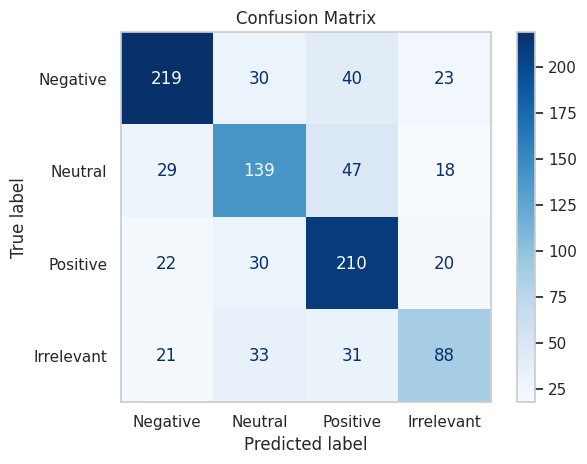

In [ ]:
model_type="roberta"

# Initialize the sentiment analyzer
analyzer = SentimentAnalyzer(model_type="roberta", num_labels=4, batch_size=64, learning_rate=1e-5, num_epochs=10)

# Train the model
analyzer.train(train_texts, train_labels)

# Save the trained model
model_save_path = os.path.join(save_dir, f"{model_type}_sentiment_model.pt")
analyzer.save_model(model_save_path)

# Evaluate the model
print(f"Evaluating model: {model_type.upper()}")
accuracy = analyzer.evaluate(test_texts, test_labels)

# Store results for later comparison
results.append({
    "model_type": model_type,
    "accuracy": accuracy
})

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch [1/10], Batch [1/94], Loss: 1.4192, Accuracy: 0.1406
Epoch [1/10], Batch [2/94], Loss: 1.3845, Accuracy: 0.2031
Epoch [1/10], Batch [3/94], Loss: 1.3867, Accuracy: 0.2240
Epoch [1/10], Batch [4/94], Loss: 1.3730, Accuracy: 0.2422
Epoch [1/10], Batch [5/94], Loss: 1.3776, Accuracy: 0.2687
Epoch [1/10], Batch [6/94], Loss: 1.3858, Accuracy: 0.2760
Epoch [1/10], Batch [7/94], Loss: 1.3625, Accuracy: 0.2991
Epoch [1/10], Batch [8/94], Loss: 1.3798, Accuracy: 0.3086
Epoch [1/10], Batch [9/94], Loss: 1.3594, Accuracy: 0.3108
Epoch [1/10], Batch [10/94], Loss: 1.3730, Accuracy: 0.3125
Epoch [1/10], Batch [11/94], Loss: 1.3686, Accuracy: 0.3153
Epoch [1/10], Batch [12/94], Loss: 1.3549, Accuracy: 0.3177
Epoch [1/10], Batch [13/94], Loss: 1.3688, Accuracy: 0.3137
Epoch [1/10], Batch [14/94], Loss: 1.3741, Accuracy: 0.3125
Epoch [1/10], Batch [15/94], Loss: 1.3447, Accuracy: 0.3156
Epoch [1/10], Batch [16/94], Loss: 1.3864, Accuracy: 0.3135
Epoch [1/10], Batch [17/94], Loss: 1.3606, Accura

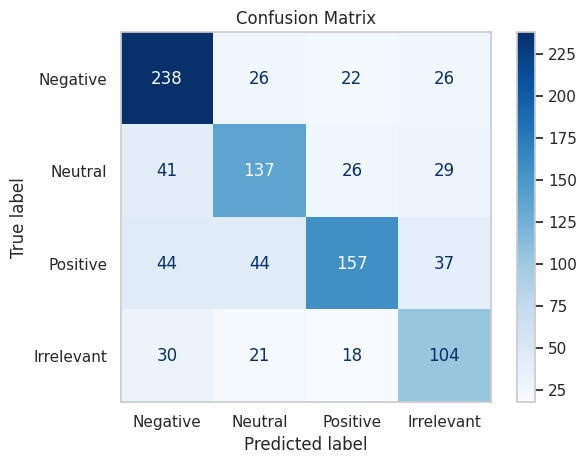

In [ ]:
model_type="distilbert"

# Initialize the sentiment analyzer
analyzer = SentimentAnalyzer(model_type="distilbert", num_labels=4, batch_size=64, learning_rate=1e-5, num_epochs=10)

# Train the model
analyzer.train(train_texts, train_labels)

# Save the trained model
model_save_path = os.path.join(save_dir, f"{model_type}_sentiment_model.pt")
analyzer.save_model(model_save_path)

# Evaluate the model
print(f"Evaluating model: {model_type.upper()}")
accuracy = analyzer.evaluate(test_texts, test_labels)

# Store results for later comparison
results.append({
    "model_type": model_type,
    "accuracy": accuracy
})

Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch [1/10], Batch [1/94], Loss: 1.3712, Accuracy: 0.3594
Epoch [1/10], Batch [2/94], Loss: 1.5358, Accuracy: 0.2656
Epoch [1/10], Batch [3/94], Loss: 1.3616, Accuracy: 0.2917
Epoch [1/10], Batch [4/94], Loss: 1.3865, Accuracy: 0.3047
Epoch [1/10], Batch [5/94], Loss: 1.2614, Accuracy: 0.3344
Epoch [1/10], Batch [6/94], Loss: 1.3811, Accuracy: 0.3281
Epoch [1/10], Batch [7/94], Loss: 1.3224, Accuracy: 0.3348
Epoch [1/10], Batch [8/94], Loss: 1.3776, Accuracy: 0.3438
Epoch [1/10], Batch [9/94], Loss: 1.3404, Accuracy: 0.3472
Epoch [1/10], Batch [10/94], Loss: 1.3900, Accuracy: 0.3422
Epoch [1/10], Batch [11/94], Loss: 1.3292, Accuracy: 0.3452
Epoch [1/10], Batch [12/94], Loss: 1.3947, Accuracy: 0.3385
Epoch [1/10], Batch [13/94], Loss: 1.3733, Accuracy: 0.3377
Epoch [1/10], Batch [14/94], Loss: 1.3951, Accuracy: 0.3359
Epoch [1/10], Batch [15/94], Loss: 1.3965, Accuracy: 0.3302
Epoch [1/10], Batch [16/94], Loss: 1.3328, Accuracy: 0.3350
Epoch [1/10], Batch [17/94], Loss: 1.2961, Accura

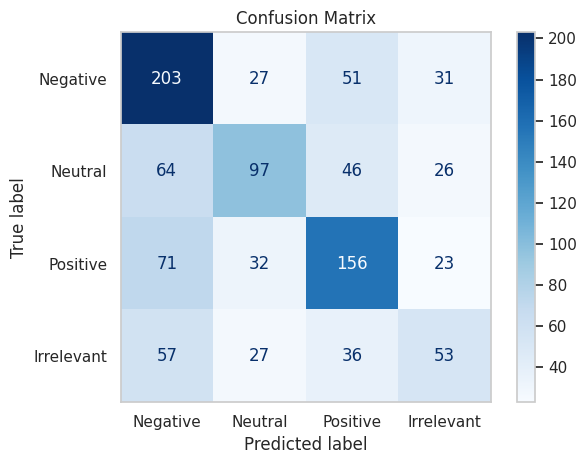

In [ ]:
model_type="albert"

# Initialize the sentiment analyzer
analyzer = SentimentAnalyzer(model_type="albert", num_labels=4, batch_size=64, learning_rate=1e-5, num_epochs=10)

# Train the model
analyzer.train(train_texts, train_labels)

# Save the trained model
model_save_path = os.path.join(save_dir, f"{model_type}_sentiment_model.pt")
analyzer.save_model(model_save_path)

# Evaluate the model
print(f"Evaluating model: {model_type.upper()}")
accuracy = analyzer.evaluate(test_texts, test_labels)

# Store results for later comparison
results.append({
    "model_type": model_type,
    "accuracy": accuracy
})


Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['logits_proj.bias', 'logits_proj.weight', 'sequence_summary.summary.bias', 'sequence_summary.summary.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch [1/10], Batch [1/94], Loss: 1.3477, Accuracy: 0.3438
Epoch [1/10], Batch [2/94], Loss: 1.4907, Accuracy: 0.2812
Epoch [1/10], Batch [3/94], Loss: 1.4749, Accuracy: 0.2656
Epoch [1/10], Batch [4/94], Loss: 1.4860, Accuracy: 0.2617
Epoch [1/10], Batch [5/94], Loss: 1.4092, Accuracy: 0.2594
Epoch [1/10], Batch [6/94], Loss: 1.3348, Accuracy: 0.2734
Epoch [1/10], Batch [7/94], Loss: 1.3608, Accuracy: 0.2746
Epoch [1/10], Batch [8/94], Loss: 1.4361, Accuracy: 0.2754
Epoch [1/10], Batch [9/94], Loss: 1.3951, Accuracy: 0.2812
Epoch [1/10], Batch [10/94], Loss: 1.3956, Accuracy: 0.2812
Epoch [1/10], Batch [11/94], Loss: 1.3437, Accuracy: 0.2855
Epoch [1/10], Batch [12/94], Loss: 1.3312, Accuracy: 0.2917
Epoch [1/10], Batch [13/94], Loss: 1.3542, Accuracy: 0.2969
Epoch [1/10], Batch [14/94], Loss: 1.4343, Accuracy: 0.2969
Epoch [1/10], Batch [15/94], Loss: 1.4356, Accuracy: 0.2927
Epoch [1/10], Batch [16/94], Loss: 1.3713, Accuracy: 0.2949
Epoch [1/10], Batch [17/94], Loss: 1.3436, Accura

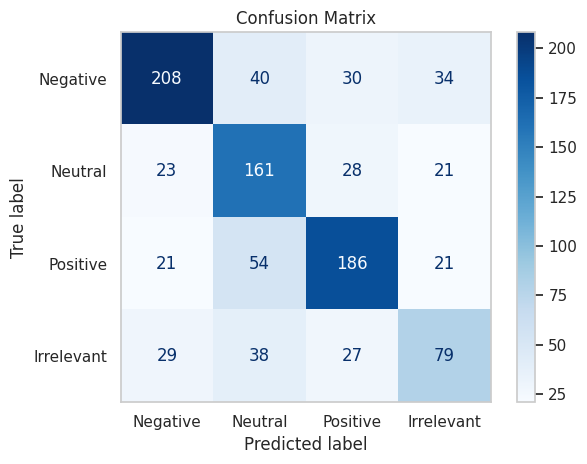

In [ ]:
model_type="xlnet"

# Initialize the sentiment analyzer
analyzer = SentimentAnalyzer(model_type="xlnet", num_labels=4, batch_size=64, learning_rate=1e-5, num_epochs=10)

# Train the model
analyzer.train(train_texts, train_labels)

# Save the trained model
model_save_path = os.path.join(save_dir, f"{model_type}_sentiment_model.pt")
analyzer.save_model(model_save_path)

# Evaluate the model
print(f"Evaluating model: {model_type.upper()}")
accuracy = analyzer.evaluate(test_texts, test_labels)

# Store results for later comparison
results.append({
    "model_type": model_type,
    "accuracy": accuracy
})

### **Sentiment Analysis Model Comparison Report**

---

#### **Evaluation Metrics**
The models were evaluated based on **Test Accuracy**, **Precision**, **Recall**, and **F1-Score** for the following sentiment classes:
1. **Negative**
2. **Neutral**
3. **Positive**
4. **Irrelevant**

The dataset included 1000 test samples, and the class-wise performance metrics highlight the strengths and weaknesses of each model.

---

### **1. Model Performance Overview**

| **Model**      | **Accuracy** | **Macro Avg Precision** | **Macro Avg Recall** | **Macro Avg F1-Score** |
|-----------------|--------------|--------------------------|-----------------------|-------------------------|
| **BERT**       | **0.6670**   | **0.66**                | **0.65**             | **0.65**               |
| **RoBERTa**    | 0.6560       | 0.65                    | 0.64                 | 0.64                   |
| **DistilBERT** | 0.6360       | 0.63                    | 0.63                 | 0.62                   |
| **XLNet**      | 0.6340       | 0.62                    | 0.62                 | 0.62                   |
| **ALBERT**     | 0.5090       | 0.50                    | 0.48                 | 0.48                   |

---

### **2. Detailed Class-Wise Metrics**

#### **a. Negative Sentiment**
- **Best Model**: BERT (F1 = 0.73)
- **Observation**: All models performed well, with **RoBERTa** and **DistilBERT** closely following BERT.
  
| **Model**      | **Precision** | **Recall** | **F1-Score** |
|-----------------|---------------|------------|--------------|
| **BERT**       | 0.75          | 0.71       | **0.73**     |
| **RoBERTa**    | 0.75          | 0.70       | 0.73         |
| **DistilBERT** | 0.67          | **0.76**   | 0.72         |
| **XLNet**      | **0.74**      | 0.67       | 0.70         |
| **ALBERT**     | 0.51          | 0.65       | 0.57         |

---

#### **b. Neutral Sentiment**
- **Best Model**: BERT (F1 = 0.64)
- **Observation**: Significant variance among models, with **ALBERT** struggling the most.

| **Model**      | **Precision** | **Recall** | **F1-Score** |
|-----------------|---------------|------------|--------------|
| **BERT**       | 0.62          | **0.66**   | **0.64**     |
| **RoBERTa**    | 0.60          | 0.60       | 0.60         |
| **DistilBERT** | **0.60**      | 0.59       | 0.59         |
| **XLNet**      | 0.55          | 0.69       | 0.61         |
| **ALBERT**     | 0.53          | 0.42       | 0.47         |

---

#### **c. Positive Sentiment**
- **Best Model**: BERT (F1 = 0.70)
- **Observation**: All models performed consistently well, with **BERT** and **RoBERTa** leading the way.

| **Model**      | **Precision** | **Recall** | **F1-Score** |
|-----------------|---------------|------------|--------------|
| **BERT**       | 0.66          | **0.75**   | **0.70**     |
| **RoBERTa**    | 0.64          | 0.74       | 0.69         |
| **DistilBERT** | **0.70**      | 0.56       | 0.62         |
| **XLNet**      | 0.69          | 0.66       | 0.67         |
| **ALBERT**     | 0.54          | 0.55       | 0.55         |

---

#### **d. Irrelevant Sentiment**
- **Best Model**: BERT (F1 = 0.53)
- **Observation**: All models struggled with this class, indicating a need for better representation in the dataset.

| **Model**      | **Precision** | **Recall** | **F1-Score** |
|-----------------|---------------|------------|--------------|
| **BERT**       | **0.61**      | 0.47       | **0.53**     |
| **RoBERTa**    | 0.59          | 0.51       | 0.55         |
| **DistilBERT** | 0.53          | **0.60**   | 0.56         |
| **XLNet**      | 0.51          | 0.46       | 0.48         |
| **ALBERT**     | 0.40          | 0.31       | 0.35         |

---

### **3. Insights and Recommendations**

#### **a. Overall Best Model**
- **BERT** outperforms all other models in terms of accuracy and class-wise metrics.
- **RoBERTa** is a close second, with only marginal differences in performance.

#### **b. Lightweight Alternatives**
- **DistilBERT** provides a good balance between performance and efficiency, making it suitable for deployment in resource-constrained environments.

#### **c. Challenging Class**
- The **Irrelevant** class is consistently difficult for all models. This may be due to:
  - **Class imbalance**: Address using oversampling or weighted loss functions.
  - **Data diversity**: Introduce more varied examples during training.
  - **Label ambiguity**: Review and refine labeling criteria for this class.

#### **d. Practical Deployment**
- If computational resources allow, **BERT** or **RoBERTa** should be the models of choice for deployment.
- Use **DistilBERT** for faster inference with minimal accuracy trade-offs.

#### **e. Model Improvement Techniques**
1. **Ensemble Modeling**: Combine predictions from multiple models for better accuracy and robustness.
2. **Fine-Tuning**: Optimize hyperparameters, experiment with learning rate schedules, and train for additional epochs.
3. **Data Augmentation**: Use techniques like synonym replacement, back translation, and paraphrasing to expand training data.
4. **Class-Specific Improvements**: Focus on improving **Irrelevant** detection by using class-specific data augmentation or task-specific pretraining.

---

### **4. Conclusion**
This evaluation highlights that **BERT** and **RoBERTa** are the top-performing models for sentiment analysis in this task. However, given the challenges with certain classes, further data preparation and model tuning could significantly enhance performance.

Would you like to explore any of the improvement techniques in detail?